In [1]:
%pip install torch
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [26]:
# Generate synthetic data
np.random.seed(0)
x = np.random.rand(100, 1)
y = 1 + 2 * x + 0.3 * x**2 + 0.1 * x**3 + np.random.randn(100, 1) * 0.1

x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [27]:
# Custom layers and model definition
class CustomLinear:
    def __init__(self, input_dim, output_dim):
        self.weights = torch.randn(input_dim, output_dim, requires_grad=True)
        self.bias = torch.randn(output_dim, requires_grad=True)

    def forward(self, x):
        return x @ self.weights + self.bias

class CustomReLU:
    def forward(self, x):
        return x.clamp_min(0.0)

class CustomModel:
    def __init__(self):
        self.layer1 = CustomLinear(1, 10)
        self.relu1 = CustomReLU()
        self.layer2 = CustomLinear(10, 10)
        self.relu2 = CustomReLU()
        self.layer3 = CustomLinear(10, 1)

    def forward(self, x):
        x = self.layer1.forward(x)
        x = self.relu1.forward(x)
        x = self.layer2.forward(x)
        x = self.relu2.forward(x)
        x = self.layer3.forward(x)
        return x
    
model = CustomModel()

In [28]:
# Mean squared error for loss calculation
def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

# Training function
def train(model, x, y, epochs, learning_rate):
    optimizer = torch.optim.SGD([model.layer1.weights, model.layer1.bias, 
                                 model.layer2.weights, model.layer2.bias, 
                                 model.layer3.weights, model.layer3.bias], 
                                lr=learning_rate)

    for epoch in range(epochs):
        model.layer1.weights.requires_grad_(True)
        model.layer1.bias.requires_grad_(True)
        model.layer2.weights.requires_grad_(True)
        model.layer2.bias.requires_grad_(True)
        model.layer3.weights.requires_grad_(True)
        model.layer3.bias.requires_grad_(True)

        # Forward pass
        y_pred = model.forward(x)

        # Compute Loss
        loss = mean_squared_error(y_pred, y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

In [29]:
# Train the model
train(model, x_tensor, y_tensor, epochs=100, learning_rate=0.01)

Epoch 0, Loss: 18.48369789123535
Epoch 10, Loss: 0.32100555300712585
Epoch 20, Loss: 0.0720466673374176
Epoch 30, Loss: 0.03215456381440163
Epoch 40, Loss: 0.024214858189225197
Epoch 50, Loss: 0.02128264494240284
Epoch 60, Loss: 0.019442500546574593
Epoch 70, Loss: 0.018529996275901794
Epoch 80, Loss: 0.01788058504462242
Epoch 90, Loss: 0.01738549955189228


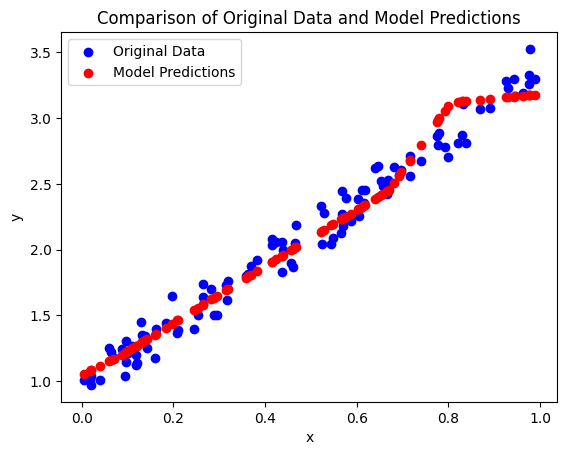

In [31]:
# Generate predictions from the model
with torch.no_grad():
    predictions = model.forward(x_tensor).numpy()

# Plotting the original data and the model's predictions
plt.scatter(x, y, label='Original Data', color='blue')
plt.scatter(x, predictions, label='Model Predictions', color='red')
plt.title('Comparison of Original Data and Model Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()